In [1]:
import numpy as np
import pickle
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
with open('./naive_supernet_stats.pckl', 'rb') as inp:
    ns = pickle.load(inp)

with open('./gs_supernet_stats.pckl', 'rb') as inp:
    gs = pickle.load(inp)
    
    
with open('./full_proposed_ml_stats.pckl', 'rb') as inp:
    ml = pickle.load(inp)

with open('./full_proposed_var_stats.pckl', 'rb') as inp:
    var = pickle.load(inp)
    
with open('./stats_rs.pckl', 'rb') as inp:
    rs = pickle.load(inp)
    

 


    

In [9]:
for data in [ns, gs, ml,  rs]:
    print (np.mean(data['param number']), np.std(data['param number']))

3168682.0 6624.0
1497598.8 435286.8935634979
214808.4 101413.69966942337
1325611.6 774714.5676620777


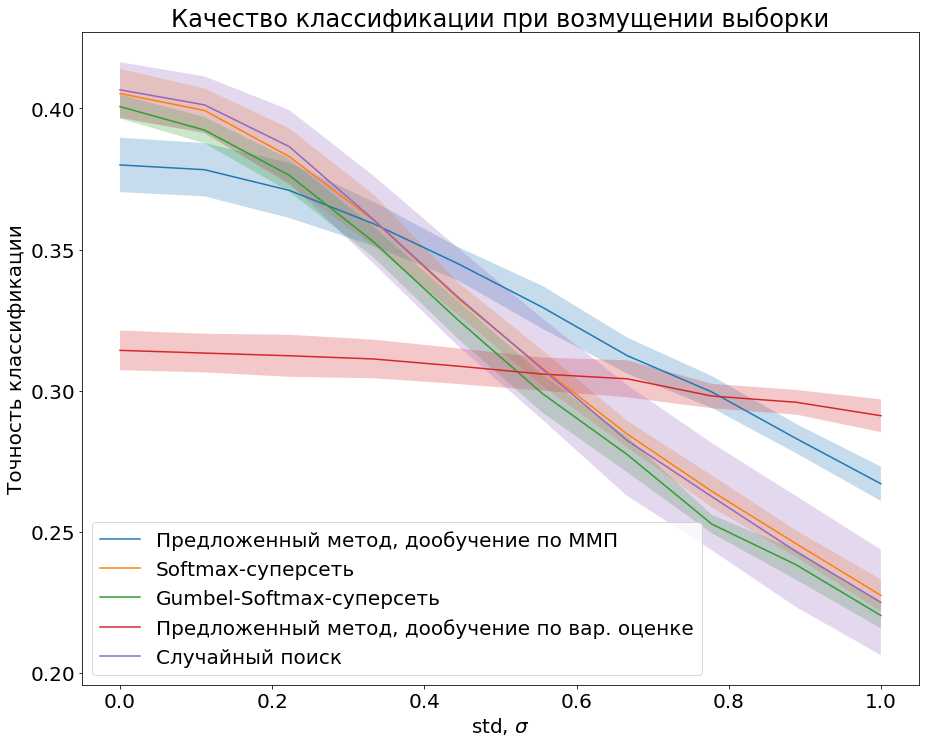

In [34]:
plt.rcParams['figure.figsize'] = (15,12)
plt.rcParams['font.size'] = 20

key = 'noise'
for d in [(ml, 'Предложенный метод, дообучение по ММП', 'r'), (ns, 'Softmax-суперсеть', 'g'),
          (gs, 'Gumbel-Softmax-суперсеть', 'b'), (var, 'Предложенный метод, дообучение по вар. оценке', 'y'), (rs, 'Случайный поиск', 'gray')]:
    X,Y,Y_std,accs = d[0][key]
    Y = np.array(Y)
    Y_std =np.array(Y_std)
    plt.plot(X, Y, label=d[1])
    plt.fill_between(X, Y-1*Y_std, Y+1*Y_std, alpha=0.25)
    #for id in range(len(X)):
    #    for acc in accs[id]:
    #        plt.scatter(X[id], acc, c=d[2], alpha=0.1)
    #plt.scatter(X[id], acc, c=d[2],  alpha=0.1)
    
    
plt.legend(loc='best')
plt.title('Качество классификации при возмущении выборки')
plt.ylabel('Точность классификации')
plt.xlabel('std, $\sigma$')
plt.savefig(key+'.pdf')

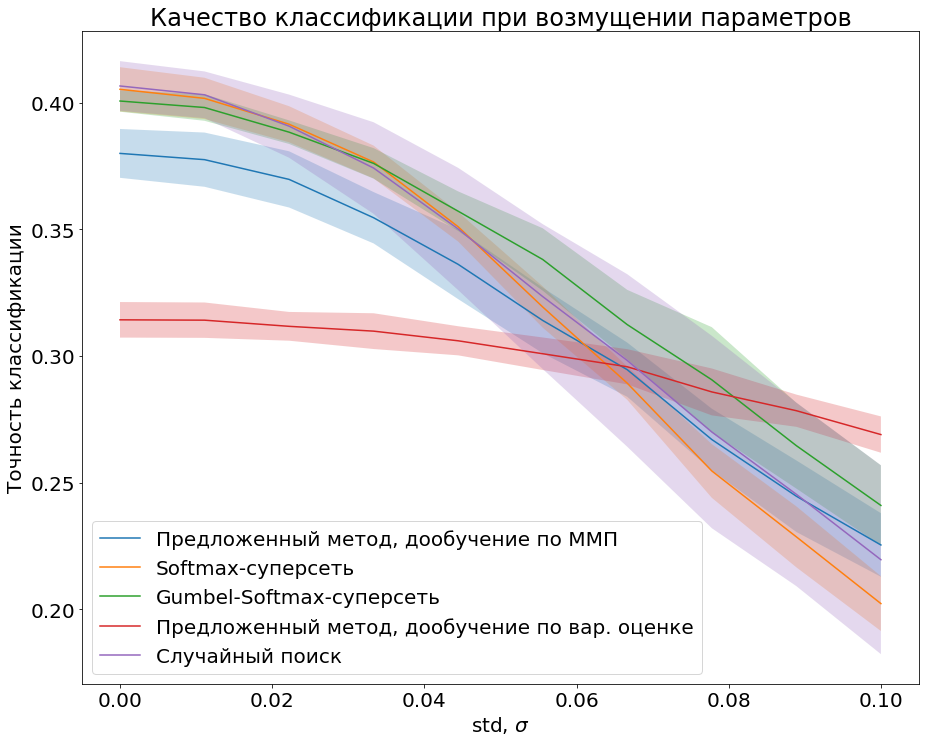

In [31]:
plt.rcParams['figure.figsize'] = (15,12)
plt.rcParams['font.size'] = 20
key = 'params'
for d in [(ml, 'Предложенный метод, дообучение по ММП', 'r'), (ns, 'Softmax-суперсеть', 'g'),
          (gs, 'Gumbel-Softmax-суперсеть', 'b'), (var, 'Предложенный метод, дообучение по вар. оценке', 'y'), (rs, 'Случайный поиск', 'gray')]:
    X,Y,Y_std,accs = d[0][key]
    Y = np.array(Y)
    Y_std =np.array(Y_std)
    plt.plot(X, Y, label=d[1])
    plt.fill_between(X, Y-1*Y_std, Y+1*Y_std, alpha=0.25)
    #for id in range(len(X)):
    #    for acc in accs[id]:
    #        plt.scatter(X[id], acc, c=d[2], alpha=0.1)
    #plt.scatter(X[id], acc, c=d[2],  alpha=0.1)
    
    
plt.legend(loc='best')
plt.title('Качество классификации при возмущении параметров')
plt.ylabel('Точность классификации')
plt.xlabel('std, $\sigma$')
plt.savefig(key+'.pdf')